### Einlesen des ursprunglichen Datensatzes

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [16]:
#Einlesen des Datensatzes
df = pd.read_csv("/data/df_original.csv")
df

,Unnamed: 0,Autor,Titel,Übersetzer,Original_Titel,ISBN,Datum,Text,removed_stop_word_lower,removed_stop_word,number_of_tokens,number_of_types,clean_text,network_text
0,0,J.K. Rowling,HARRY POTTER und der Gefangene von Askaban,Klaus Fritz,Harry Potter and the Prisoner of Azkaban,978-1-78110-057-8,1999,"\n\n\nFür Jill Prewett und Aine Kiely,\n\ndie ...","\n\n\nfür jill prewett und aine kiely,\n\ndie ...","jill prewett aine kiely, patinnen souls inhalt...",115980.0,19479.0,jill prewett aine kiely patinnen souls inhalt ...,für jill prewett und aine kiely die patinne...
1,1,J.K. Rowling,HARRY POTTER und der Halbblutprinz,Klaus Fritz,Harry Potter and the Half-Blood Prince,978-1-78110-060-8,2005,"\n\n\nMackenzie,\n\nmeiner schönen Tochter,\n\...","\n\n\nmackenzie,\n\nmeiner schönen tochter,\n\...","mackenzie, schönen tochter, widme zwilling tin...",179884.0,26838.0,mackenzie schönen tochter widme zwilling tinte...,mackenzie meiner schönen tochter widme ich...
2,2,J.K. Rowling,HARRY POTTER und der Orden des Phönix,Klaus Fritz,Harry Potter and the Order of the Phoenix,978-1-78110-059-2,2003,"\n\n\n\n\nFür Neil, Jessica und David,\n\ndie ...","\n\n\n\n\nfür neil, jessica und david,\n\ndie ...","neil, jessica david, welt verzaubern inhalt du...",268898.0,35356.0,neil jessica david welt verzaubern inhalt dudl...,für neil jessica und david die meine welt ...
3,3,J.K. Rowling,HARRY POTTER und der Stein der Weisen,Klaus Fritz,Harry Potter and the Philosopher’s Stone,978-1-78110-055-4,1997,"\n\n\n\nFür Jessica, für Anne und fü Di;\n\nJe...","\n\n\n\nfür jessica, für anne und fü di;\n\nje...","jessica, anne fü di; jessica mag geschichten, ...",84152.0,15910.0,jessica anne fü di jessica mag geschichten ann...,für jessica für anne und fü di jessica mag ...
4,4,J.K. Rowling,HARRY POTTER und die Heiligtümer des Todes,Klaus Fritz,Harry Potter and the Deathly Hallows,978-1-78110-061-5,2007,\n\n\nDie\n\nWidmung\n\ndieses Buches\n\nist\n...,\n\n\ndie\n\nwidmung\n\ndieses buches\n\nist\n...,"widmung buches siebengeteilt: neil, jessica, d...",207576.0,29725.0,widmung buches siebengeteilt neil jessica davi...,die widmung dieses buches ist siebengete...
5,5,J.K. Rowling,HARRY POTTER und die Kammer des Schreckens,Klaus Fritz,Harry Potter and the Chamber of Secrets,978-1-78110-056-1,1998,"\n\n\nFür Sean P. F. Harris,\n\nFluchtwagen-Fa...","\n\n\nfür sean p. f. harris,\n\nfluchtwagen-fa...","sean p. f. harris, fluchtwagen-fahrer freund s...",91968.0,17391.0,sean p f harris fluchtwagen fahrer freund stür...,für sean p f harris fluchtwagen fahrer und ...
6,6,J.K. Rowling,HARRY POTTER und der Feuerkelch,Klaus Fritz,Harry Potter and the Goblet of Fire,978-1-78110-058-5,2000,"Für Peter Rowling,\n\nin Erinnerung an Mr Ridl...","für peter rowling,\n\nin erinnerung an mr ridl...","peter rowling, erinnerung mr ridley, susan sla...",203341.0,29070.0,peter rowling erinnerung mr ridley susan sladd...,für peter rowling in erinnerung an mr ridley ...


### Document-Term-Matrix →  tf-idf-Matrix → Dendrogramm


In [17]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords

german_stop_words = stopwords.words('german')

#Konvertiert eine Sammlung von Rohdokumenten in eine Matrix von TF-IDF-Merkmalen.
vectorizer = CountVectorizer(stop_words = german_stop_words)
X = vectorizer.fit_transform(df.clean_text)

numpy = X.toarray()
#print(vectorizer.get_feature_names())
#print(X.shape)

df10 = pd.DataFrame(data=numpy, index=df.Titel, 
                   columns=vectorizer.get_feature_names())
df10

,056,057,058,059,060,061,10,11,12,125,...,übten,übung,übungen,übungsblätter,übungsstunden,üppig,üppige,üppigen,üppiger,üppiges
Titel,,,,,,,,,,,,,,,,,,,,,
HARRY POTTER und der Gefangene von Askaban,0,0,1,0,0,0,1,0,0,1,...,1,0,0,0,0,0,0,2,0,1
HARRY POTTER und der Halbblutprinz,0,0,0,0,0,1,1,0,1,0,...,2,1,0,0,3,1,2,2,0,0
HARRY POTTER und der Orden des Phönix,0,0,0,0,1,0,0,0,0,0,...,3,2,2,0,1,0,0,0,0,0
HARRY POTTER und der Stein der Weisen,1,0,0,0,0,0,1,1,0,0,...,0,3,1,0,0,0,0,1,0,0
HARRY POTTER und die Heiligtümer des Todes,0,0,0,0,0,0,0,0,0,0,...,1,1,1,0,0,1,0,0,0,0
HARRY POTTER und die Kammer des Schreckens,0,1,0,0,0,0,0,0,1,0,...,1,2,0,0,0,0,1,2,0,1
HARRY POTTER und der Feuerkelch,0,0,0,1,0,0,0,0,0,0,...,2,2,0,1,0,1,0,0,1,1


Aus http://brandonrose.org/clustering

dist is defined as 1 - the cosine similarity of each document. Cosine similarity is measured against the tf-idf matrix and can be used to generate a measure of similarity between each document and the other documents in the corpus (each synopsis among the synopses). Subtracting it from 1 provides cosine distance which I will use for plotting on a euclidean (2-dimensional) plane.

Note that with dist it is possible to evaluate the similarity of any two or more synopses.


In [18]:
#Quelle: http://brandonrose.org/clustering

from sklearn.metrics.pairwise import cosine_similarity
dist = 1 - cosine_similarity(df10)
dist

array([[ 5.55111512e-16,  6.57606627e-02,  4.56295291e-02,
         6.14475373e-02,  6.11053404e-02,  5.32835628e-02,
         5.50627369e-02],
       [ 6.57606627e-02, -4.44089210e-16,  3.87415011e-02,
         7.38249482e-02,  4.59218295e-02,  5.82896674e-02,
         4.84907302e-02],
       [ 4.56295291e-02,  3.87415011e-02, -1.99840144e-15,
         6.70881858e-02,  4.89245380e-02,  5.39081171e-02,
         3.63187072e-02],
       [ 6.14475373e-02,  7.38249482e-02,  6.70881858e-02,
        -2.22044605e-16,  7.26031894e-02,  5.47007368e-02,
         6.04855233e-02],
       [ 6.11053404e-02,  4.59218295e-02,  4.89245380e-02,
         7.26031894e-02, -8.88178420e-16,  6.36652851e-02,
         4.92597217e-02],
       [ 5.32835628e-02,  5.82896674e-02,  5.39081171e-02,
         5.47007368e-02,  6.36652851e-02,  1.66533454e-15,
         4.85006456e-02],
       [ 5.50627369e-02,  4.84907302e-02,  3.63187072e-02,
         6.04855233e-02,  4.92597217e-02,  4.85006456e-02,
        -8.8817842

Aus http://brandonrose.org/clustering

Ward clustering is an agglomerative clustering method, meaning that at each stage, 
the pair of clusters with minimum between-cluster distance are merged. 
I used the precomputed cosine distance matrix (dist) to calclate a linkage_matrix, which I then plot as a dendrogram

array([[ 2.        ,  6.        ,  0.05380593,  2.        ],
       [ 1.        ,  4.        ,  0.06613604,  2.        ],
       [ 0.        ,  5.        ,  0.07679688,  2.        ],
       [ 7.        ,  8.        ,  0.0783292 ,  4.        ],
       [ 3.        ,  9.        ,  0.08937343,  3.        ],
       [10.        , 11.        ,  0.12616148,  7.        ]])

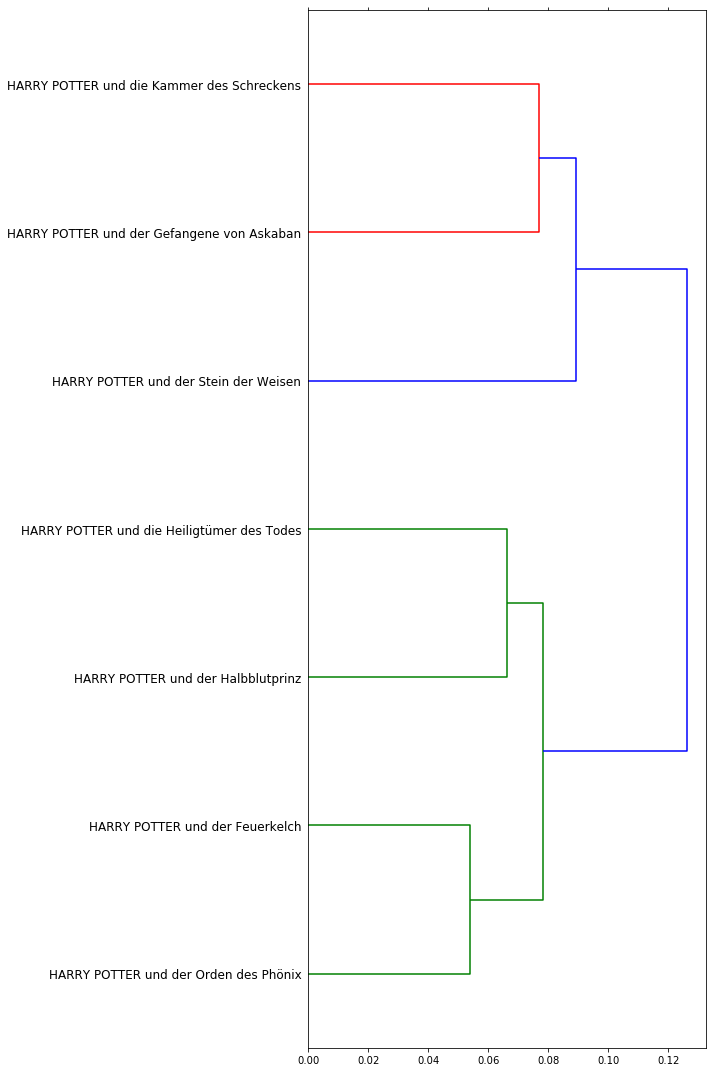

In [19]:
#Quelle: http://brandonrose.org/clustering

from scipy.cluster.hierarchy import ward, dendrogram

linkage_matrix = ward(dist) #define the linkage_matrix using ward clustering pre-computed distances

fig, ax = plt.subplots(figsize=(10, 15)) # set size
ax = dendrogram(linkage_matrix, orientation="right", labels=df10.index);

plt.tick_params(\
    axis= 'x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom='off',      # ticks along the bottom edge are off
    top='off',         # ticks along the top edge are off
    labelbottom='off')

plt.tight_layout() #show plot with tight layout
linkage_matrix

#uncomment below to save figure
#plt.savefig('ward_clusters.png', dpi=200) #save figure as ward_clusters